# Module 02_03: Kmeans Algorithm Using Intel® Extension for Scikit-learn*

![Assets/Kmeans.jpg](Assets/Kmeans.jpg)

<a id='Back-to-Sections'></a>
# Sections
- _Discussion:_ [Kmeans Algorithm](#Kmeans-Algorithm)
- _Code:_ [Implementation of Kmeans targeting CPU using Intel Extension for Scikit-learn for Kmeans interactive](#Implementation-of-Kmeans-in-Batch-mode)

You will review, modify and execute code for unsupervised clustering of data using Intel Extension for Scikit-learn for Kmeans on a single CPU



## Learning Objectives

* Describe the value of Intel® Extension for Scikit-learn methodology in extending scikit-learn optimzation capabilites
* Name key imports and function calls to use Intel Extension for Scikit-learn to target Kmeans
* Build a Sklearn implementation of Kmeans targeting CPU using patching
* Apply patching with dynamic versus lexical scope approaches 

# Intel Extension for Scikit-learn

Intel® Extension for Scikit-learn contains drop-in replacement patching functionality for the Scikit-learn machine learning library for Python. The patches were originally available in the daal4py package. All future updates for the patching will be available only in Intel Extension for Scikit-learn. All performance claims obtained using daal4py are applicable for Intel Extension for Scikit-learn.

The value of the patch is providing optimized versions of common Scikit-learn machine learning algorithms used for data science. An added value is the ability to invoke these functions on either CPU or GPU.

Applying Intel(R) Extension for Scikit-learn will impact the following existing [scikit-learn algorithms:](https://intel.github.io/scikit-learn-intelex/algorithms.html)

You can take advantage of the optimizations of Intel Extension for Scikit-learn by adding just two lines of code before the usual Scikit-learn imports:

 - from sklearnex import patch_sklearn
 - patch_sklearn()
 - ...
 - from sklearn.cluster import KMeans
 - ... import other sklearn algoritms as needed ...

Intel Extension for Scikit-learn uses Intel® oneAPI Data Analytics Library (oneDAL) to achieve its acceleration. The optimizations aim for the efficient use of CPU resources. The library enables all the latest vector instructions, such as Intel® Advanced Vector Extensions (Intel AVX-512). It also uses cache-friendly data blocking, fast Basic Linear Algebra Subprograms (BLAS) operations with Intel OneAPI Math Kernel Library (oneMKL), scalable multi-threading with Intel oneAPI Thread Building Blocks (oneTBB) library, and more.

# Kmeans Algorithm
Kmeans is a clustering algorithm that partitions observations from a dataset into a requested number of geometric clusters of points closest to the cluster’s own center of mass. Using an initial estimate of the centroids, the algorithm iteratively updates the positions of the centroids until a fixed point.


Kmeans is a simple and powerful ML algorithm to cluster data into similar groups. Its objective is to split a set of N observations into K clusters. This is achieved by minimizing inertia (i.e., the sum of squared Euclidian distances from observations to the cluster centers, or centroids). The algorithm is iterative, with two steps in each iteration:
* For each observation, compute the distance from it to each centroid, and then reassign each observation to the cluster with the nearest centroid.
* For each cluster, compute the centroid as the mean of observations assigned to this cluster.

Repeat these steps until the number of iterations exceeds a predefined maximum or the algorithm converges (i.e., the difference between two consecutive inertias is less than a predefined threshold).
Different methods are used to get initial centroids for the first iteration. The algorithm can select random observations as initial centroids or use more complex methods such as kmeans

- [Back to Sections](#Back-to-Sections)

### About the data
The data included in these exercises was built seperately using the **sklearn.datasets make_blobs** function which synthesizes data for analysis by specifying: 
 - The number of samples in the dataset called n_samples, for example n_sample = 200000
 - The number of columns in the dataset called n_features, for exmaple n_features = 50,
 - The number of cluster centers called centers, for example centers = 10, 
 - The standard deviation for each cluster called cluster_std, for example cluster_std = 0.2,
 - The spatial range over which the clusters range, called center_box for example center_box = (-10.0, 10.0), 
 - A seed called random_state, for example random_state = 777
 
 ## Exercise:
 
 - Apply patching method to ensure that the code uses the optimized kmeans from Intel Extensions for scikit-leanr*
 - Apply paching both within the compute_fit_predict function scope and alternatively: outside the scope of this function. Does patching work in either case? Experiment with lexical versus dynamic extentent of where patch is applied
 - Ensure one kmeans cell is patched, and the other is unpatched

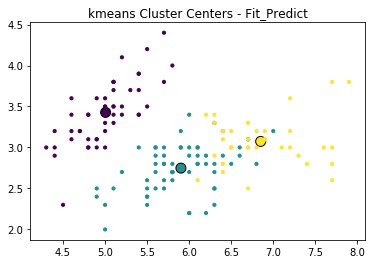

In [1]:
# functions of interest kmeans.fit_predict which return ndArray
# This cell is running in interactive mode on Jupyter
# This allows the leaner to experiment and play

import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

def compute_fit_predict():
    import numpy as np
    import os

### Apply patch here alternative 1 ######



###########################

    from sklearn.cluster import KMeans

    #infile = os.path.join('data', 'batch', 'kmeans_dense.csv')
    nCentroids = 3

    iris = datasets.load_iris()
    columns = iris.feature_names
    data = iris.data
    kmeans = KMeans(nCentroids, init='random', random_state=0)

    labels = pd.DataFrame( kmeans.fit_predict(data), columns = ['labels'] )

    labels.to_csv('kmeans_Labels.csv', index=False)
    cluster_centers = pd.DataFrame(kmeans.cluster_centers_)
    cluster_centers.to_csv('kmeans_ClusterCenters.csv', index=False )

### Apply patch here alternative 2 ######
### question if patch is applied here - is it applied BEFORE the import KMeans?


###########################
compute_fit_predict()
cluster_centers = pd.read_csv('kmeans_ClusterCenters.csv')
labels = pd.read_csv('kmeans_Labels.csv')

iris = datasets.load_iris()
data = iris.data
plt.title('kmeans Cluster Centers - Fit_Predict')
plt.scatter(cluster_centers.iloc[:, 0], cluster_centers.iloc[:, 1], s=100, c=[0,1,2], edgecolor="k")
plt.scatter(data[:, 0], data[:, 1], s=10, c=labels['labels'])
plt.show()


## Key learning
Patching BEFORE the import implies the dynamic scoping - meaning that the it is applied and a thread of execution encounters the statements

So even though, is lexically before the patch (lexically -  as a human would read the code from top to bottom)

the patch get applied - because as an execution of code (thread) perspective, the patch is applied, then the function is called and then the import for kmeans occurs


def compute_fit_predict():
...
...from sklearn.cluster import KMeans
...
path_sklearn()
compute_fit_predict()


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


execution time:  0.6031720638275146


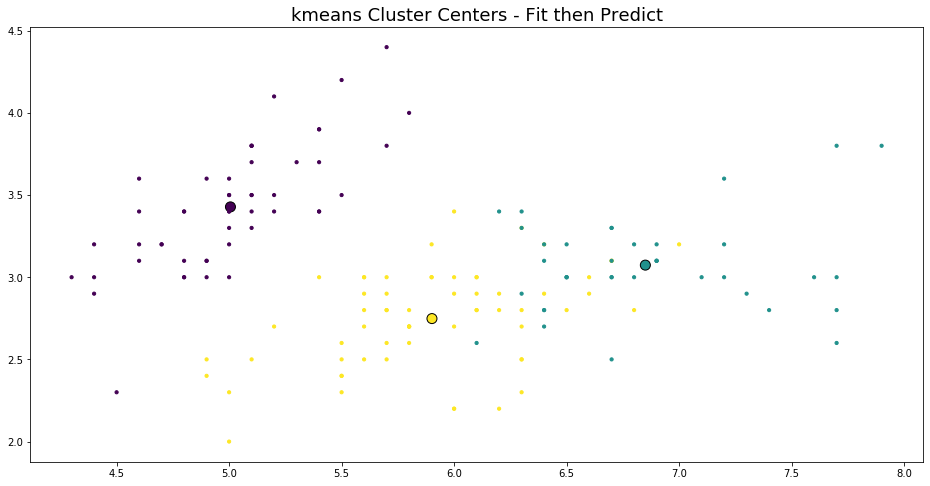

In [2]:
# functions of interest kmeans.fit_predict which return ndArray
# This cell is running in interactive mode on Jupyter
# This allows the leaner to experiment and play

def compute_fit_then_predict():
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    import os

    from sklearn import datasets
    from sklearn.cluster import KMeans

    #infile = os.path.join('data', 'batch', 'kmeans_dense.csv')
    nCentroids = 3

    iris = datasets.load_iris()
    columns = iris.feature_names
    data = iris.data
    kmeans = KMeans(nCentroids, init='random', random_state=0)

    km_model = kmeans.fit(data)
    labels = pd.DataFrame( km_model.predict(data), columns = ['labels'] )

    labels.to_csv('kmeans_Labels.csv', index=False)
    cluster_centers = pd.DataFrame(km_model.cluster_centers_)
    cluster_centers.to_csv('kmeans_ClusterCenters.csv', index=False )

import time
start = time.time()


from sklearnex import patch_sklearn
patch_sklearn()

# Unpatch code - do not remove the above line - just add an unpatch below
# this demonstrates how to add or remove patching at any granualr level

### Apply UNpatch here ######


###########################
compute_fit_then_predict()
print("execution time: ", time.time() - start)
cluster_centers = pd.read_csv('kmeans_ClusterCenters.csv')
labels = pd.read_csv('kmeans_Labels.csv')
plt.figure(figsize = (16,8))
plt.title('kmeans Cluster Centers - Fit then Predict', fontsize = 18)
plt.scatter(cluster_centers.iloc[:, 0], cluster_centers.iloc[:, 1], s=100, c=[0,1,2], edgecolor="k")
plt.scatter(data[:, 0], data[:, 1], s=10, c=labels['labels'])
plt.show()

## Summary
In this module you will have learned the following:
* Able to Name key imports and function calls to use Intel Extension for Scikit-learn to target Kmeans for use on CPU

# Notices & Disclaimers 

Intel technologies may require enabled hardware, software or service activation.
No product or component can be absolutely secure.

Your costs and results may vary.

© Intel Corporation. Intel, the Intel logo, and other Intel marks are trademarks of Intel Corporation or its subsidiaries. 
*Other names and brands may be claimed as the property of others.